[(1.0, 3.0), (2.0, 6.0), (3.0, 19.0), (5.0, 99.0), (7.0, 291.0), (8.0, 444.0)]


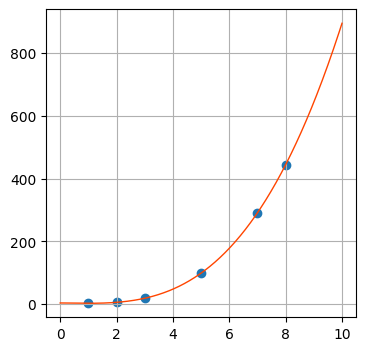

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# avalia o polinomio interpolador usando polinomios de Lagrange
def interpolL(x,T):
    Soma=0
    for i in range(len(T)):
        produto=1.0
        
        for j in range(len(T)):
            if j==i: continue
            produto=produto*(x-T[j][0])/(T[i][0]-T[j][0])
        
        Soma=Soma+T[i][1]*produto

    return Soma

T = []

# Coloca os dados do .csv na matriz T
with open('problema1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

    def parseFloat(value):
        return float(value)

    pulaLinha1 = True

    for row in spamreader:

        # Pula a linha que tem as letras 'x' e 'y'
        if pulaLinha1:
            pulaLinha1 = False
            continue

        result = row[0].split(',')
        T.append((float(result[0]), float(result[1])))

print(T)

# define o polinomio interpolador p(x)
p= lambda x: interpolL(x,T) 

# Exibe o gráfico
x=np.linspace(0,10,500)
plt.figure(figsize=(4, 4))
plt.plot(x,p(x), color='#FF4500', marker = '', linewidth=1.0)

pointsX = []
pointsY = []

for point in T:
    pointsX.append(point[0])
    pointsY.append(point[1])

plt.scatter(pointsX, pointsY)

plt.grid()
plt.show()

